# Visualization of ICESat-2 ATL06 (Land Surface Elevation) Data
## Of note, there are much more detailed tutorials on handling ICESat-2 data. https://github.com/ICESAT-2HackWeek
### First begin be defining user editable variables

In [1]:
# Define location of ICESat-2 file
file_dir = "../data/"
file_name = "ATL06_20190227024546_09260211_001_02_gt1l.h5"

### Next, import all necessary python modules from the ICESat-2 environment (ICESat-2.yml).

In [2]:
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
cm = plt.cm.get_cmap('Reds')

### Function to calculate distance along track. Taken from Bruno Rocha

In [3]:
# Returns distance between two points in kilometers
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) \
    * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = radius * c
    return d

### Load in ICESat-2 data and inspect meta data.

In [4]:
# Load file
file_path = file_dir + file_name
data = h5py.File(file_path, 'r')

"""
Uncomment the next command to print meta data. 
Note by using the "!", you are telling the interpreter 
to execute as a bash command, not python! 
"""
#!h5dump -H $file_path

# Load elevation data to memory
elevation = data['h_elv']#[0:100]
lat = data['lat']#[0:100]
lon = data['lon']#[0:100]

# Calculate distance along track (dat)
dat = distance([lat[0], lon[0]], [lat, lon])

### Plot location of ICESat-2 granule



Text(0.5, 1.0, 'Granule Track Elevation')

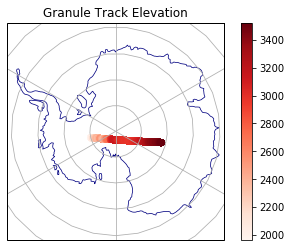

In [5]:
#%matplotlib widget
crs_southpole = ccrs.SouthPolarStereo(central_longitude=0.0, globe=None)
crs_latlon = ccrs.PlateCarree()
plt.figure()
ax = plt.axes(projection=crs_southpole)
ax.coastlines(linewidth=0.75, color='navy')
ax.set_extent((-180, 180, -90, -65), crs=crs_latlon)
ax.gridlines(crs=crs_latlon, linestyle='-')
scatter = ax.scatter(lon, lat, c = elevation, transform=ccrs.Geodetic(), cmap = cm)
plt.colorbar(scatter)
plt.title("Granule Track Elevation")

### Plot distance along track vs. elevation. Zoom in on interesting features using the widget feature. 

In [9]:
%matplotlib widget
fig2 = plt.figure()
plt.plot(dat, elevation)
plt.xlabel("Distance Along Track [km]")
plt.ylabel("Elevation [m]")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …